# Normed

In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
import numpy as np
import sklearn
from sklearn.cluster import KMeans


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = _reader.readWord2Vec()
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[ 0.02987077 -0.15110606 -0.02884087 ...  0.02446168 -0.08834651
  -0.09221231]
 [ 0.05298314 -0.05420527  0.02592565 ...  0.01782615 -0.02950471
   0.00508323]
 [ 0.07016749 -0.05757345 -0.13483836 ...  0.10909334 -0.0250241
  -0.0654501 ]
 ...
 [ 0.10532002 -0.05241808 -0.02433    ... -0.01405231  0.03333547
   0.01318201]
 [ 0.10429937 -0.1797766  -0.05073992 ...  0.01325834 -0.18105656
  -0.07903843]
 [ 0.13153867 -0.05729359 -0.04480435 ... -0.00396843 -0.05132721
   0.00955163]]
(13229, 128)


## Creating a Dendogram
We are using lastP as metric for the linkage method: 

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

`https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html`

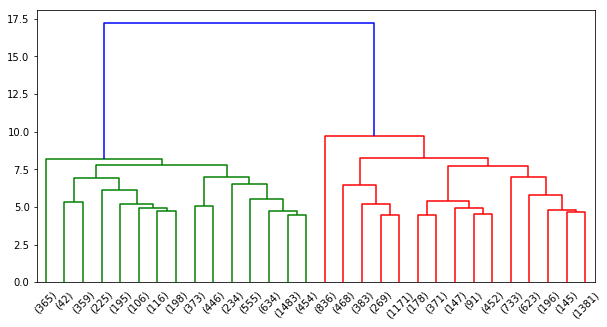

In [3]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(X)

## Selecting the Cut 
Based on the above dendogram we will put a cut off line. 
`max_d = 4`

In [4]:
reload(_optimizer)
clusters = _optimizer.fcluster_cut(X, max_d=4)
clusters.shape, np.unique(clusters)

((13229,),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36], dtype=int32))